# Data Exploration for Context-Aware Movie Recommender System


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

%matplotlib inline


## Load the Data


In [25]:

# dataset = load_dataset('auxten/movielens-20m',  trust_remote_code=True)
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd



In [26]:
api = KaggleApi()
api.authenticate()


In [28]:
dataset_path = 'grouplens/movielens-20m-dataset'
dataset = api.dataset_download_files(dataset_path, unzip=True )


Dataset URL: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset


In [34]:
# Extract ratings and movies data
ratings = pd.read_csv('../data/rating.csv')
movies = pd.read_csv('../data/movie.csv')


print(ratings.shape)
print(movies.shape)

ratings.head()

(20000263, 4)
(27278, 3)


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


## Basic Statistics


In [36]:
print(ratings.describe())
print("\nNumber of unique users:", ratings['userId'].nunique())
print("Number of unique movies:", ratings['movieId'].nunique())


             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00

Number of unique users: 138493
Number of unique movies: 26744


## Rating Distribution


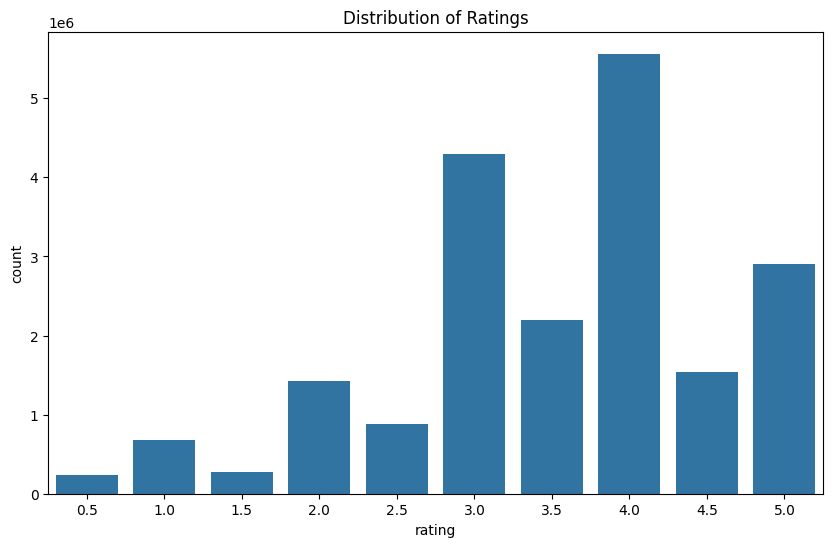

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.show()


## Temporal Analysis


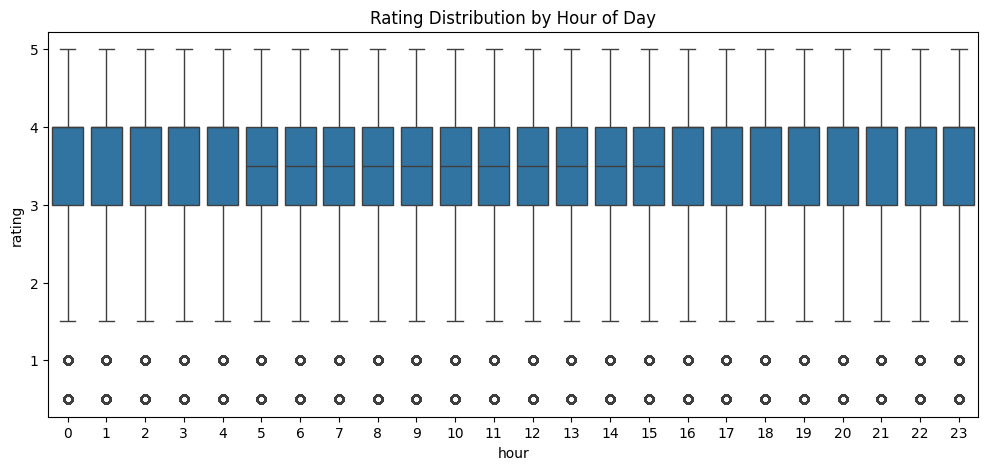

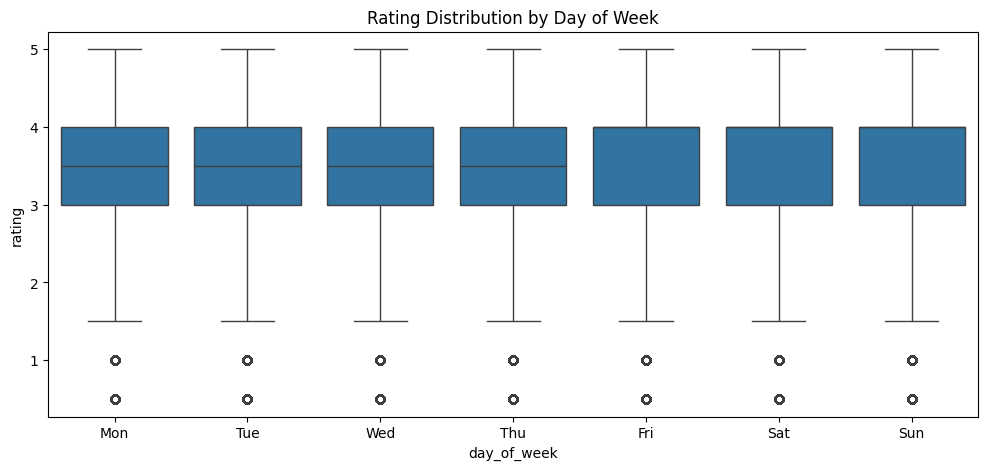

In [39]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings['hour'] = ratings['timestamp'].dt.hour
ratings['day_of_week'] = ratings['timestamp'].dt.dayofweek

plt.figure(figsize=(12, 5))
sns.boxplot(x='hour', y='rating', data=ratings)
plt.title('Rating Distribution by Hour of Day')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='day_of_week', y='rating', data=ratings)
plt.title('Rating Distribution by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


## Conclusion

Based on this exploratory data analysis, we can observe:
1. The dataset contains a good number of users and movies for training a recommender system.
2. Ratings are skewed towards positive values, with 4 being the most common rating.
3. There are slight variations in rating patterns across different hours of the day and days of the week, which supports our hypothesis that contextual information may be valuable for improving recommendations.
